In [775]:
from cdpr_definition import *

cdpr_spec = mj.MjSpec.from_file("cdpr_8_6.xml")
cdpr_model=cdpr_spec.compile()
cdpr_data= mj.MjData(cdpr_model)
print([actuator.target for actuator in cdpr_spec.actuators])

['cable_tendon_0', 'cable_tendon_1', 'cable_tendon_2', 'cable_tendon_3', 'cable_tendon_4', 'cable_tendon_5', 'cable_tendon_6', 'cable_tendon_7']


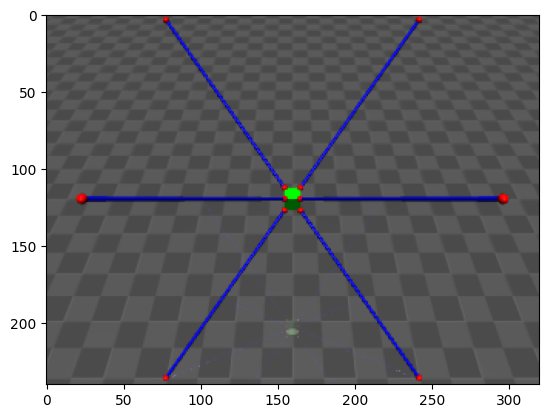

In [776]:
renderer=mj.Renderer(cdpr_model)
mj.mj_step(cdpr_model, cdpr_data)
renderer.update_scene(cdpr_data, camera="main_camera")
render=renderer.render()
plt.imshow(render)
plt.show()

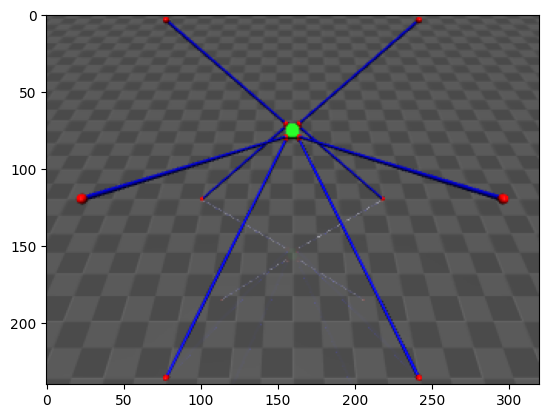

In [777]:
import time
from IPython import display
%matplotlib inline

#Controls 0 to 7 inclusive control cable tendons 0 to 7 inclusive.
#Every mujoco simulation step moves forward by 0.002 seconds by default.

desired_position=[0,machine_frame_width/2,machine_frame_height/2]
desired_orientation=[0,0,0]

wal_start_time= time.time()
sim_start_time = cdpr_data.time
for _ in range(int(10/cdpr_model.opt.timestep)+1):
    cdpr_data.ctrl=inverse_kinematics(target_xyz=desired_position, target_orientation=desired_orientation)
    mj.mj_step(cdpr_model, cdpr_data)
    if (time.time() - wal_start_time)<(cdpr_data.time-sim_start_time):
        renderer.update_scene(cdpr_data, camera="main_camera")
        render=renderer.render()
        plt.imshow(render)
        display.display(plt.gcf())
        display.clear_output(wait=True)

In [778]:
actual_ee_rot_mat=np.stack([cdpr_data.sensor("end_effector_xv").data, cdpr_data.sensor("end_effector_yv").data, cdpr_data.sensor("end_effector_zv").data])
actual_ee_axis_angles=R.from_matrix(actual_ee_rot_mat).as_rotvec(degrees=True)
actual_ee_position=cdpr_data.sensor("end_effector_position").data
actual_ee_position, actual_ee_axis_angles

(array([-3.32360593e-17,  3.86633297e+00,  3.77178217e+00]),
 array([-4.19463057e+01, -9.53836988e-15,  1.00283943e-14]))